<a href="https://colab.research.google.com/github/BoonthichaSaejia/Homework_Datacamp_1/blob/master/Day34_Neural%20Network/Day34_Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow import keras

## **Import Data**

In [75]:
import requests
csv_url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
req = requests.get(csv_url)
url_content = req.content
csv_file = open('diabetes.csv', 'wb')

csv_file.write(url_content)
csv_file.close()

In [76]:
df=pd.read_csv('diabetes.csv',header=None)
df.columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Split Data**

In [77]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [79]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(491, 8)
(491,)
(123, 8)
(123,)
(154, 8)
(154,)


In [132]:
# sequential model
from keras.optimizers import Adam
def get_SequentialModel(learning_rate = 0.00005):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(16,activation='relu',input_shape=(8,)))
    model.add(keras.layers.Dense(32,activation='tanh'))
    model.add(keras.layers.Dense(1,activation='sigmoid'))
    model.compile(optimizer= Adam(lr=learning_rate),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [133]:
model = get_SequentialModel()
history = model.fit(x_train,y_train,epochs=150,validation_data=(x_val,y_val))

Epoch 1/150
16/16 [==============================] - 1s 13ms/step - loss: 0.8240 - accuracy: 0.4215 - val_loss: 0.8117 - val_accuracy: 0.4309
Epoch 2/150
16/16 [==============================] - 0s 5ms/step - loss: 0.8099 - accuracy: 0.4233 - val_loss: 0.7997 - val_accuracy: 0.4390
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 0.7986 - accuracy: 0.4422 - val_loss: 0.7885 - val_accuracy: 0.4715
Epoch 4/150
16/16 [==============================] - 0s 5ms/step - loss: 0.7824 - accuracy: 0.4816 - val_loss: 0.7789 - val_accuracy: 0.4797
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 0.7869 - accuracy: 0.4655 - val_loss: 0.7715 - val_accuracy: 0.4959
Epoch 6/150
16/16 [==============================] - 0s 4ms/step - loss: 0.7889 - accuracy: 0.5043 - val_loss: 0.7637 - val_accuracy: 0.4797
Epoch 7/150
16/16 [==============================] - 0s 4ms/step - loss: 0.7562 - accuracy: 0.5339 - val_loss: 0.7575 - val_accuracy: 0.4797
Epoch 8/150


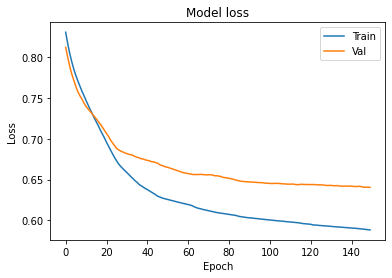

In [134]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

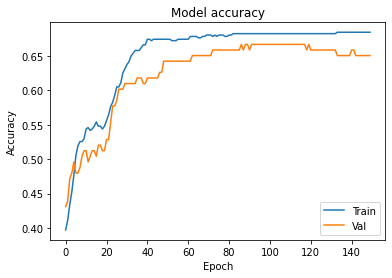

In [135]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [136]:
z = model.predict(x_test)
for arrPre in z:
  if arrPre[0]>=0.5: arrPre[0]=1
  else: arrPre[0]=0

In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,z)

array([[98,  1],
       [52,  3]])

## normalize

In [138]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

In [139]:
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_scale, y, test_size=0.2, random_state=1)
x_train_norm, x_val_norm, y_train_norm, y_val_norm = train_test_split(x_train_norm, y_train_norm, test_size=0.2, random_state=1)

In [140]:
print(x_train_norm.shape)
print(y_train_norm.shape)
print(x_val_norm.shape)
print(y_val_norm.shape)
print(x_test_norm.shape)
print(y_test_norm.shape)

(491, 8)
(491,)
(123, 8)
(123,)
(154, 8)
(154,)


In [143]:
model_2 = get_SequentialModel()
history_2 = model_2.fit(x_train_norm,y_train_norm,epochs=500,validation_data=(x_val_norm,y_val_norm))

Epoch 1/500
16/16 [==============================] - 1s 22ms/step - loss: 0.6980 - accuracy: 0.4522 - val_loss: 0.6881 - val_accuracy: 0.5691
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6948 - accuracy: 0.4849 - val_loss: 0.6848 - val_accuracy: 0.6098
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5950 - val_loss: 0.6820 - val_accuracy: 0.6341
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.6447 - val_loss: 0.6794 - val_accuracy: 0.6341
Epoch 5/500
16/16 [==============================] - 0s 6ms/step - loss: 0.6820 - accuracy: 0.6775 - val_loss: 0.6771 - val_accuracy: 0.6423
Epoch 6/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.6663 - val_loss: 0.6750 - val_accuracy: 0.6423
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6832 - accuracy: 0.6462 - val_loss: 0.6733 - val_accuracy: 0.6423
Epoch 8/500


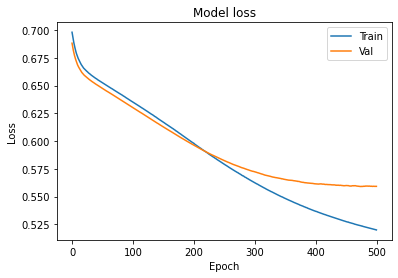

In [144]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

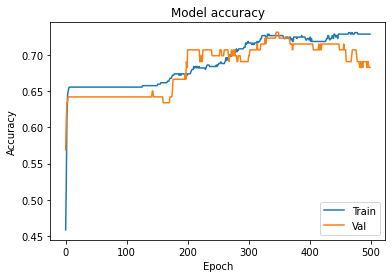

In [146]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [147]:
z2 = model_2.predict(x_test_norm)
for arrPre in z2:
  if arrPre[0]>=0.5: arrPre[0]=1
  else: arrPre[0]=0

In [148]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_norm,z2)

array([[89, 10],
       [29, 26]])